# Data preprocessing

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import albumentations as A

In [2]:
from collections import namedtuple

PATHS = {
    'train': 'data/train',
    'val': 'data/val'
}

IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 256, 256, 3

Label = namedtuple( 'Label' , [
    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'color'       , # The color of this label
    ] )


labels = [
    #       name                     id      category            catId     color
    Label(  'unlabeled'            ,  0 ,    'void'            , 0       , (  0,  0,  0) ),
    Label(  'dynamic'              ,  1 ,    'void'            , 0       , (111, 74,  0) ),
    Label(  'ground'               ,  2 ,    'void'            , 0       , ( 81,  0, 81) ),
    Label(  'road'                 ,  3 ,    'ground'          , 1       , (128, 64,128) ),
    Label(  'sidewalk'             ,  4 ,    'ground'          , 1       , (244, 35,232) ),
    Label(  'parking'              ,  5 ,    'ground'          , 1       , (250,170,160) ),
    Label(  'rail track'           ,  6 ,    'ground'          , 1       , (230,150,140) ),
    Label(  'building'             ,  7 ,    'construction'    , 2       , ( 70, 70, 70) ),
    Label(  'wall'                 ,  8 ,    'construction'    , 2       , (102,102,156) ),
    Label(  'fence'                ,  9 ,    'construction'    , 2       , (190,153,153) ),
    Label(  'guard rail'           , 10 ,    'construction'    , 2       , (180,165,180) ),
    Label(  'bridge'               , 11 ,    'construction'    , 2       , (150,100,100) ),
    Label(  'tunnel'               , 12 ,    'construction'    , 2       , (150,120, 90) ),
    Label(  'pole'                 , 13 ,    'object'          , 3       , (153,153,153) ),
    Label(  'traffic light'        , 14 ,    'object'          , 3       , (250,170, 30) ),
    Label(  'traffic sign'         , 15 ,    'object'          , 3       , (220,220,  0) ),
    Label(  'vegetation'           , 16 ,    'nature'          , 4       , (107,142, 35) ),
    Label(  'terrain'              , 17 ,    'nature'          , 4       , (152,251,152) ),
    Label(  'sky'                  , 18 ,    'sky'             , 5       , ( 70,130,180) ),
    Label(  'person'               , 19 ,    'human'           , 6       , (220, 20, 60) ),
    Label(  'rider'                , 20 ,    'human'           , 6       , (255,  0,  0) ),
    Label(  'car'                  , 21 ,    'vehicle'         , 7       , (  0,  0,142) ),
    Label(  'truck'                , 22 ,    'vehicle'         , 7       , (  0,  0, 70) ),
    Label(  'bus'                  , 23 ,    'vehicle'         , 7       , (  0, 60,100) ),
    Label(  'caravan'              , 24 ,    'vehicle'         , 7       , (  0,  0, 90) ),
    Label(  'trailer'              , 25 ,    'vehicle'         , 7       , (  0,  0,110) ),
    Label(  'train'                , 26 ,    'vehicle'         , 7       , (  0, 80,100) ),
    Label(  'motorcycle'           , 27 ,    'vehicle'         , 7       , (  0,  0,230) ),
    Label(  'bicycle'              , 28 ,    'vehicle'         , 7       , (119, 11, 32) ),
]

In [3]:
def display_images(*args):
    num = len(args)
    plt.figure()
    
    if num == 1:
        plt.imshow(args[0])
    else:
        f, axarr = plt.subplots(1,num) 

        for i in range(num):
            axarr[i].imshow(args[i])

def get_unique_pixels(image):
    unique_pixels = []
    for row in image:
        for pixel in row:
            pixel = pixel.tolist()
            if pixel not in unique_pixels:
                unique_pixels.append(pixel)
    return unique_pixels

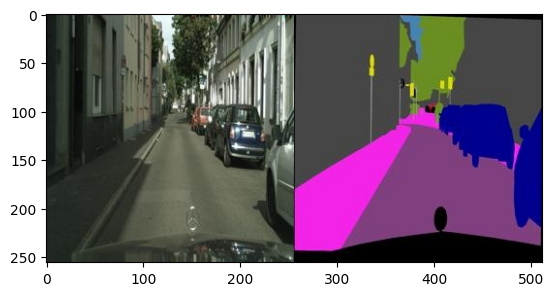

In [4]:
img = cv2.imread(PATHS['train']+'/'+os.listdir(PATHS['train'])[69])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_images(img)

<Figure size 640x480 with 0 Axes>

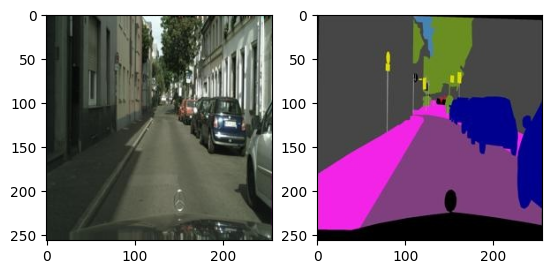

In [5]:
split_idx = img.shape[1]//2
original_img = img[:, :split_idx]
mask = img[:, split_idx:]
display_images(original_img, mask)

In [6]:
len(get_unique_pixels(mask))

10636

In [7]:
centers = []

for label in labels:
    centers.append(label.color)

centers = np.array(centers)

In [8]:
NUM_CLASSES = len(centers)
NUM_CLASSES

29

In [9]:
km = KMeans(n_clusters=NUM_CLASSES, init=centers, n_init=1)
km.fit(centers)

KMeans(init=array([[  0,   0,   0],
       [111,  74,   0],
       [ 81,   0,  81],
       [128,  64, 128],
       [244,  35, 232],
       [250, 170, 160],
       [230, 150, 140],
       [ 70,  70,  70],
       [102, 102, 156],
       [190, 153, 153],
       [180, 165, 180],
       [150, 100, 100],
       [150, 120,  90],
       [153, 153, 153],
       [250, 170,  30],
       [220, 220,   0],
       [107, 142,  35],
       [152, 251, 152],
       [ 70, 130, 180],
       [220,  20,  60],
       [255,   0,   0],
       [  0,   0, 142],
       [  0,   0,  70],
       [  0,  60, 100],
       [  0,   0,  90],
       [  0,   0, 110],
       [  0,  80, 100],
       [  0,   0, 230],
       [119,  11,  32]]),
       n_clusters=29, n_init=1)

In [10]:
def recolor_mask(mask):
    new_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    preds = km.predict(mask.reshape(IMG_HEIGHT*IMG_WIDTH, IMG_CHANNELS))
    preds = preds.reshape((IMG_HEIGHT, IMG_WIDTH))
    for y in range(IMG_HEIGHT):
        for x in range(IMG_WIDTH):
            category = labels[preds[y][x]].categoryId
            name = labels[preds[y][x]].name
            
            if category == 0:
                new_value = (  0,  0, 0)
            elif category == 1 and name == "sidewalk":
                new_value = (244, 35,232)
            elif category == 1:
                new_value = (128, 64,128)
            elif category == 2:
                new_value = ( 70, 70, 70)
            elif category == 3:
                new_value = (153,153,153)
            elif category == 4:
                new_value = (107,142, 35)
            elif category == 5:
                new_value = ( 70,130,180)
            elif category == 6:
                new_value = (220, 20, 60)
            elif category == 7:
                new_value = (  0,  0,142)
                
            new_mask[y][x][:] = new_value
    return new_mask.astype('int64')

In [11]:
recolored_mask = recolor_mask(mask)
len(get_unique_pixels(mask)), len(get_unique_pixels(recolored_mask))

(10636, 8)

<Figure size 640x480 with 0 Axes>

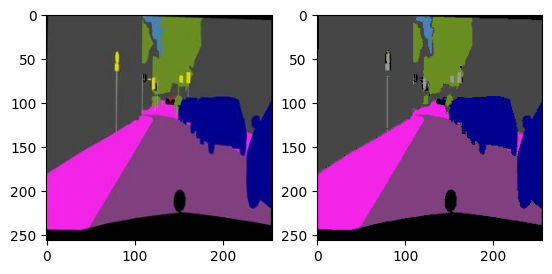

In [12]:
display_images(mask, recolored_mask)

In [13]:
DEST_PATHS = {
    "train": "cleaned_data/train",
    "val": "cleaned_data/val",
}

for path in DEST_PATHS.values():
    if not os.path.exists(path):
        os.makedirs(path)

In [14]:
categories = [
(0, 0, 0),  (244, 35,232), (128, 64,128),( 70, 70, 70),(153,153,153), (107,142, 35),( 70,130,180),(220, 20, 60), (  0,  0,142)
]

onehot = np.zeros((len(categories), len(categories)))
for i in range(len(categories)):
    onehot[i][i] = 1

onehot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [15]:
for folder, path in PATHS.items():
    for img_file in os.listdir(path):
        img = cv2.imread(path+'/'+img_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.array(img)

        split_idx = img.shape[1]//2
        original_img = img[:, :split_idx]
        mask = img[:, split_idx:]
        mask = recolor_mask(mask)
        img[:, split_idx:] = mask

        dest_path = DEST_PATHS[folder]

        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(dest_path+'/'+img_file, img)

# Loading and labeling data

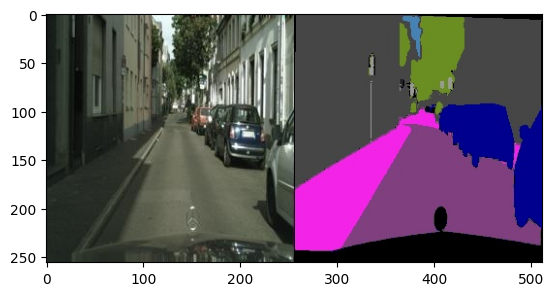

In [15]:
PATHS = DEST_PATHS

img = cv2.imread(PATHS['train']+'/'+os.listdir(PATHS['train'])[69])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [16]:
def calculate_class_weights(y):
    shape_0 = 1
    for i in y.shape[:-1]:
        shape_0 *= i

    num_classes = y.shape[-1]
    class_weights = [0]*num_classes

    shape = (shape_0, num_classes)
    y = y.reshape(shape)
    sum = 0

    counter = {}
    for i in y:
        argmax = np.argmax(i)
        sum += 1
        if argmax in counter:
            counter[argmax] += 1
        else:
            counter[argmax] = 1
    
    for i, amount in counter.items():
        class_weights[i] = sum/(amount*num_classes)

    return class_weights

In [17]:
sample_masks = []

for img_file in os.listdir(path)[:100]:
    img = cv2.imread(path+'/'+img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)

    split_idx = img.shape[1]//2
    mask = img[:, split_idx:]
    mask = recolor_mask(mask)

    sample_masks.append(mask)

sample_masks = np.array(sample_masks)

In [18]:
sample_masks.shape

(100, 256, 256, 3)

In [19]:
def to_categories(mask):
    new_mask = np.zeros((IMG_HEIGHT*IMG_WIDTH, len(onehot)))
    km = KMeans(n_clusters=len(categories), init=np.array(categories), n_init=1)
    km.fit(categories)
    mask = km.predict(mask.reshape((IMG_HEIGHT*IMG_WIDTH, IMG_CHANNELS))) 
    
    for idx, cat in enumerate(mask):
        new_mask[idx][:] = onehot[cat]
    return new_mask.reshape((IMG_HEIGHT, IMG_WIDTH, len(onehot)))

In [20]:
new_mask = to_categories(sample_masks[0])
new_mask.shape

(256, 256, 9)

In [21]:
new_masks = []
for sample_mask in sample_masks:
    new_masks.append(to_categories(sample_mask))
sample_masks = np.array(new_masks)

In [22]:
sample_masks.shape

(100, 256, 256, 9)

In [23]:
class_weights = calculate_class_weights(sample_masks)

In [24]:
class_weights

[1.0127322460863948,
 2.6085443999046314,
 0.31666787465874224,
 0.5282767855660234,
 9.547994201504986,
 0.7136052450682393,
 4.016557513088011,
 6.336719440431782,
 1.5025437504442105]

In [25]:
class ImageMaskGenerator(tf.keras.utils.Sequence):
    def __init__(self, shuffle:bool=True, batch_size:int=32, max_angle:int=40,
                       normalize_masks:bool=False, color2class:dict={}, is_sparse:bool=False, centers:list=[]):
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.normalize_masks = normalize_masks
        self.transform = A.Compose([
                            A.HorizontalFlip(p=0.5),
                            A.RandomBrightnessContrast(p=0.4),
                            A.Rotate(limit=max_angle)
                        ])
        
        self.km = KMeans(n_clusters=len(centers), init=centers, n_init=1)
        self.km.fit(centers)
        
    def __len__(self):
        return len(self.dataset) // self.batch_size
    
    def __getitem__(self, index):
        batch = self.dataset[index * self.batch_size:min(len(self.dataset), (index + 1) * self.batch_size)]
        X, y = self.__get_data(batch)
        return X, y
    
    def to_categories(self, mask):
        new_mask = np.zeros((IMG_HEIGHT*IMG_WIDTH, len(self.onehot)))
        mask = self.km.predict(mask.reshape((IMG_HEIGHT*IMG_WIDTH, IMG_CHANNELS)))
        for idx, cat in enumerate(mask):
            new_mask[idx][:] = self.onehot[cat]
        return new_mask.reshape((IMG_HEIGHT, IMG_WIDTH, len(self.onehot)))
    
    def __get_data(self, batch):
        images = []
        masks = []
        for file in batch: 
            if type(file) == str:
                original_image = self.__read_image(self.path + '/' + file)
                image = original_image[:, :IMG_WIDTH]
                mask = original_image[:, IMG_WIDTH:]
            else:
                image, mask = file

            transformed = self.transform(image=image, mask=mask)
            image = transformed['image']
            mask = transformed['mask']

            mask = self.to_categories(mask)
            
            image = np.array(image, dtype='float32')
            mask = np.array(mask, dtype='int32')

            image /= 255.
            
            images.append(image)
            masks.append(mask)

        images = np.array(images)
        masks = np.array(masks)
        return images, masks
    
    def __read_image(self, path):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img
    
    
    def flow_from_directory(self, path, onehot:list = []):
        self.path = path
        self.dataset = os.listdir(path)
        self.onehot = onehot
        
    def flow(self, dataset, onehot:list = []):
        self.dataset = dataset
        self.onehot = onehot
        
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.dataset)


In [26]:
train_gen = ImageMaskGenerator(centers=np.array(categories), batch_size=8)
train_gen.flow_from_directory(PATHS['train'], onehot)

In [27]:
images, masks = train_gen[0]

In [28]:
get_unique_pixels(masks[0])

[[1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0]]

In [29]:
val_gen = ImageMaskGenerator(centers=np.array(categories), batch_size=8)
val_gen.flow_from_directory(PATHS['val'], onehot)

In [30]:
import tensorflow.keras.backend as K

def dice_coef(y_true, y_pred, smooth=1e-7):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice

class DiceCoefLoss(tf.keras.losses.Loss):
    def __init__(self, class_weights=[]):
        super(DiceCoefLoss, self).__init__()
        self.class_weights = class_weights

    def get_weight_multiplier(self, y_true):
        axis = -1
        classSelectors = K.argmax(y_true, axis=axis)
        classSelectors = tf.cast(classSelectors, 'int32')
        classSelectors = [K.equal(i, classSelectors) for i in range(len(self.class_weights))]
        classSelectors = [tf.cast(x, 'float32') for x in classSelectors]

        weights = [sel * w for sel,w in zip(classSelectors, self.class_weights)]
        weightMultiplier = weights[0]

        for i in range(1, len(weights)):
            weightMultiplier = weightMultiplier + weights[i]

        return weightMultiplier
    
    def loss(self, y_true, y_pred, smooth=1e-7):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)

        intersection = K.sum(y_true_f * y_pred_f)
        dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
        return 1 - dice

    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        loss = self.loss(y_true, y_pred) 
        if self.class_weights:
            weightMultiplier = self.get_weight_multiplier(y_true)

            loss = tf.math.reduce_sum(loss * weightMultiplier)
            return loss
        return loss


In [31]:
loss = DiceCoefLoss([0.1, 10, 5])

loss(tf.convert_to_tensor([0, 1, 0]), tf.convert_to_tensor(np.random.random((3))))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-05-04 23:16:15.205340: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-04 23:16:15.205943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(), dtype=float32, numpy=2.0739002>

In [32]:
def conv_block(input, filters):
    x = tf.keras.layers.Conv2D(filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(input)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Conv2D(filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    return x

def encoder_block(input, filters):
    c = conv_block(input, filters)
    x = tf.keras.layers.MaxPool2D((2, 2))(c)
    return c, x

def decoder_block(input, input2, filters):
    x = conv_block(input, filters)
    x = tf.keras.layers.Conv2DTranspose(filters, (2, 2), 2, padding="same")(x)
    x = tf.keras.layers.concatenate([x, input2])
    return x

def build_model(num_classes):
    input = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    vgg = tf.keras.applications.vgg19.VGG19(include_top=False, input_tensor=input)

    for layer in vgg.layers:
        layer.trainable = False

    c1 = vgg.get_layer('block1_conv2').output
    c2 = vgg.get_layer('block2_conv2').output
    c3 = vgg.get_layer('block3_conv3').output
    c4 = vgg.get_layer('block4_conv3').output
    c5 = vgg.get_layer('block5_conv3').output
    x = decoder_block(c5, c4, 1024)
    x = decoder_block(x, c3, 512)
    x = decoder_block(x, c2, 256)
    x = decoder_block(x, c1, 128)
    x1 = conv_block(x, 64)
    x = conv_block(x, 32)

    output = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)
    model = tf.keras.Model(inputs=[input], outputs=[output])
    return model

In [33]:
model = build_model(len(onehot[0]))

In [34]:

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=DiceCoefLoss(class_weights),
            # loss = weighted_loss(dice_coef_loss, class_weights),
              metrics=[dice_coef, tf.keras.metrics.CategoricalAccuracy()])

In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 256, 256, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

In [76]:
hist = model.fit_generator(train_gen, validation_data=val_gen, epochs=10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
371/371 [==============================] - 250s 674ms/step - loss: 80084.3438 - dice_coef: 0.8500 - categorical_accuracy: 0.8501 - val_loss: 90638.4922 - val_dice_coef: 0.8287 - val_categorical_accuracy: 0.8288
Epoch 2/10
371/371 [==============================] - 247s 666ms/step - loss: 80003.1406 - dice_coef: 0.8504 - categorical_accuracy: 0.8505 - val_loss: 99496.5469 - val_dice_coef: 0.8121 - val_categorical_accuracy: 0.8123
Epoch 3/10
371/371 [==============================] - 251s 676ms/step - loss: 78760.4922 - dice_coef: 0.8525 - categorical_accuracy: 0.8526 - val_loss: 95404.2031 - val_dice_coef: 0.8207 - val_categorical_accuracy: 0.8208
Epoch 4/10
371/371 [==============================] - 249s 670ms/step - loss: 78551.9062 - dice_coef: 0.8529 - categorical_accuracy: 0.8530 - val_loss: 90234.7266 - val_dice_coef: 0.8306 - val_categorical_accuracy: 0.8307
Epoch 5/10
371/371 [==============================] - 253s 681ms/step - loss: 77478.7734 - dice_coef: 0.8551 - c

In [77]:
model.save('unet_vgg19_backbone_30_epochs.h5')
model.save_weights('unet_vgg19_backbone_30_epochs_weights.h5')

In [36]:
model.load_weights('unet_vgg19_backbone_30_epochs_weights.h5')

In [37]:
def one_hot_to_colors(mask):
    new_mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype='int32')
    for i in range(IMG_HEIGHT):
        for j in range(IMG_WIDTH):
            new_mask[i, j, :] = categories[np.argmax(mask[i][j])]
    return new_mask

In [38]:
def predict_random_image():
    idx = np.random.randint(0, 8)
    test_images, test_masks = val_gen[0][:]
    test_image = test_images[idx]
    test_mask = test_masks[idx]
    
    pred_mask = model.predict(np.expand_dims(test_image, axis=0))[0]
    
    pred_mask = one_hot_to_colors(pred_mask)
    test_mask = one_hot_to_colors(test_mask)
    
    display_images(test_image, test_mask, pred_mask)

1/1 [==============================] - 0s 21ms/step


<Figure size 640x480 with 0 Axes>

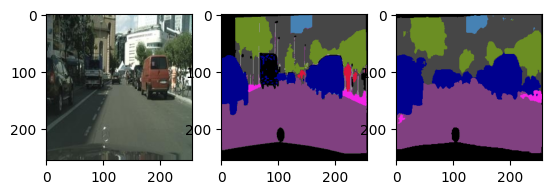

In [40]:
predict_random_image()